In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, f1_score 
import optuna

c:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("c:/Users/REVAN/Documents/ML/dataset_candidate_credit_line/application_record.csv")
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
DD = data.drop(columns=['ID', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_MOBIL', 'OCCUPATION_TYPE'])
DD.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,M,Y,Y,0,427500.0,Working,Rented apartment,-12005,-4542,1,0,0,2.0
1,M,Y,Y,0,427500.0,Working,Rented apartment,-12005,-4542,1,0,0,2.0
2,M,Y,Y,0,112500.0,Working,House / apartment,-21474,-1134,0,0,0,2.0
3,F,N,Y,0,270000.0,Commercial associate,House / apartment,-19110,-3051,0,1,1,1.0
4,F,N,Y,0,270000.0,Commercial associate,House / apartment,-19110,-3051,0,1,1,1.0


In [8]:
categorical_cols = DD.select_dtypes(include=['object']).columns

label_encoders = {}  
for col in DD.columns:
    le = LabelEncoder()
    DD[col] = le.fit_transform(DD[col])  
    label_encoders[col] = le  


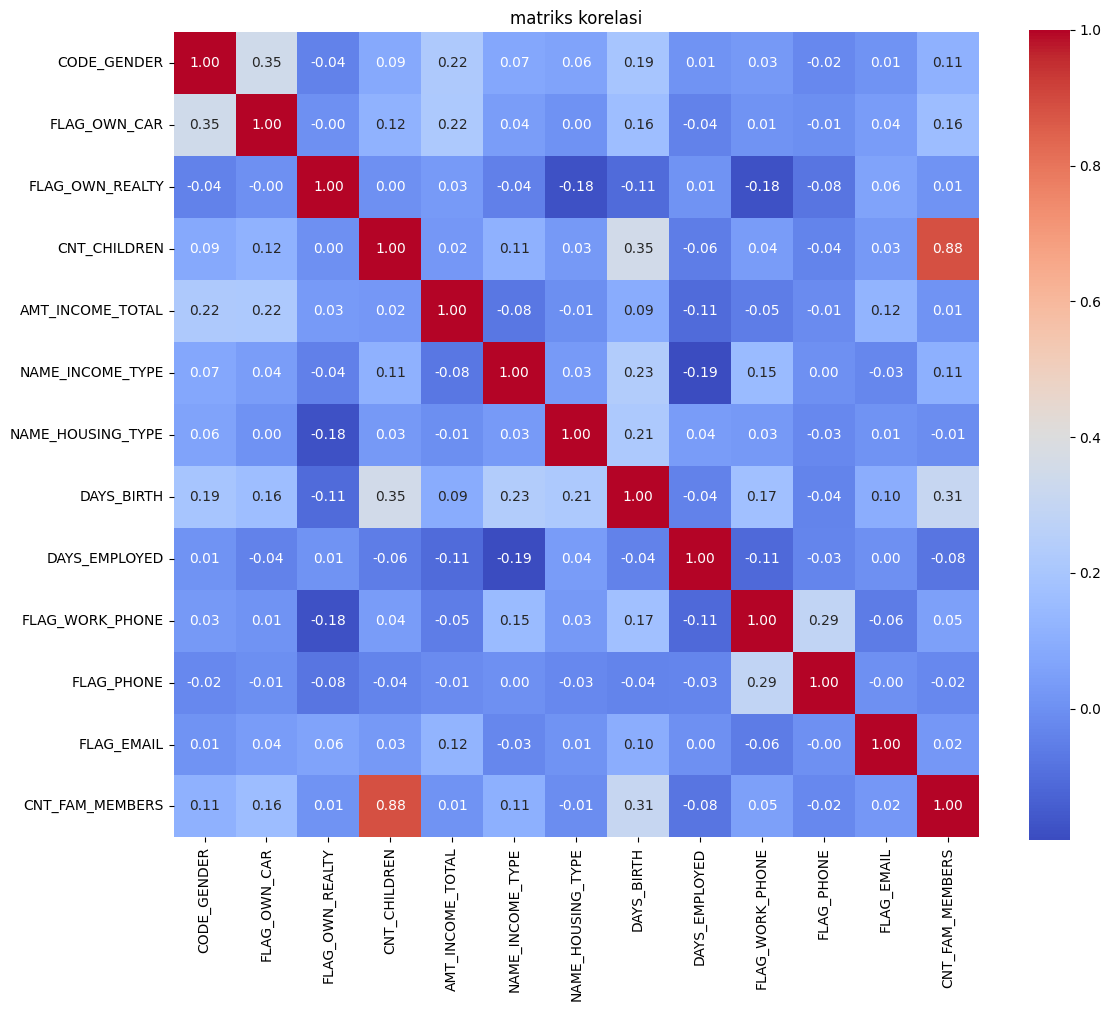

In [9]:
plt.figure(figsize=(12, 10))
korelasi_EDA = DD.corr()
sns.heatmap(korelasi_EDA, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('matriks korelasi')
plt.tight_layout()
plt.show()



In [10]:
data['label'] = (
    (data['AMT_INCOME_TOTAL'] >= 250000) &
    (data['NAME_HOUSING_TYPE'] != 'Rented apartment') &
    (data['NAME_INCOME_TYPE'] != 'Pensioner')
).astype(int)

X = DD.drop(['AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE'], axis = 1)
Y = data['label']

latih_x, uji_x, latih_y, uji_y = train_test_split(X, Y, test_size = 0.3, random_state = 15)

skala = StandardScaler()
skala_latih_x = skala.fit_transform(latih_x)
skala_uji_x = skala.transform(uji_x)

In [12]:
def tanpa_normalisasi(uji):
    params = {
        'n_estimators': uji.suggest_int('n_estimators', 100, 300),
        'max_depth': uji.suggest_int('max_depth', 5, 15),
        'min_samples_split': uji.suggest_int('min_samples_split', 3, 6),
        'min_samples_leaf': uji.suggest_int('min_samples_leaf', 2, 5),
        'max_features': uji.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 15,
        'n_jobs': -1
    }

    model1 = RandomForestClassifier(**params)
    crossvalidation1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
    hasil1 = cross_val_score(model1, latih_x, latih_y, scoring='roc_auc', cv=crossvalidation1, n_jobs=-1)
    
    return hasil1.mean()

def normalisasi(uji):
    params = {
        'n_estimators': uji.suggest_int('n_estimators', 100, 300),
        'max_depth': uji.suggest_int('max_depth', 5, 15),
        'min_samples_split': uji.suggest_int('min_samples_split', 3, 6),
        'min_samples_leaf': uji.suggest_int('min_samples_leaf', 2, 5),
        'max_features': uji.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 15,
        'n_jobs': -1
    }

    model2 = RandomForestClassifier(**params)
    crossvalidation2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
    hasil2 = cross_val_score(model2, skala_latih_x, latih_y, scoring='roc_auc', cv=crossvalidation2, n_jobs=-1)
    
    return hasil2.mean()


In [13]:
ujicoba_tanpanormalisasi = optuna.create_study(direction='maximize')
ujicoba_tanpanormalisasi.optimize(tanpa_normalisasi, n_trials=30, timeout=600)  

modelterbaik_tanpanormalisasi = RandomForestClassifier(**ujicoba_tanpanormalisasi.best_params, random_state=15, n_jobs=-1)
modelterbaik_tanpanormalisasi.fit(latih_x, latih_y)

print("Nilai terbaik ROC AUC(tanpa normalisasi):", ujicoba_tanpanormalisasi.best_value)
print("Parameters terbaik dari tuning:", ujicoba_tanpanormalisasi.best_params)

[I 2025-04-07 23:10:44,021] A new study created in memory with name: no-name-70ee2418-daa1-4854-8b4f-682a0a34d47b
[I 2025-04-07 23:15:24,207] Trial 0 finished with value: 0.8951392972046882 and parameters: {'n_estimators': 215, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8951392972046882.
[I 2025-04-07 23:18:09,950] Trial 1 finished with value: 0.7515848813108879 and parameters: {'n_estimators': 185, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.8951392972046882.
[I 2025-04-07 23:19:29,403] Trial 2 finished with value: 0.7345991464707332 and parameters: {'n_estimators': 116, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8951392972046882.
[I 2025-04-07 23:21:23,843] Trial 3 finished with value: 0.7800210675777737 and parameters: {'n_estimators': 118, 'max_depth': 10, 'min

Nilai terbaik ROC AUC(tanpa normalisasi): 0.8951392972046882
Parameters terbaik dari tuning: {'n_estimators': 215, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


In [14]:
ujicoba_normalisasi = optuna.create_study(direction='maximize')
ujicoba_normalisasi.optimize(normalisasi, n_trials=30, timeout=600)  

modelterbaik_normalisasi = RandomForestClassifier(**ujicoba_normalisasi.best_params, random_state=15, n_jobs=-1)
modelterbaik_normalisasi.fit(skala_latih_x, latih_y)

print("Nilai terbaik ROC AUC(normalisasi):", ujicoba_normalisasi.best_value)
print("Parameters terbaik dari tuning:", ujicoba_normalisasi.best_params)

[I 2025-04-07 23:30:52,584] A new study created in memory with name: no-name-ceb8fbfc-d229-4743-b4c2-8f6586622c19
[I 2025-04-07 23:33:29,394] Trial 0 finished with value: 0.8251623302571535 and parameters: {'n_estimators': 100, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8251623302571535.
[I 2025-04-07 23:36:58,159] Trial 1 finished with value: 0.8539447865022304 and parameters: {'n_estimators': 158, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8539447865022304.
[I 2025-04-07 23:39:40,506] Trial 2 finished with value: 0.7643225841897474 and parameters: {'n_estimators': 165, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.8539447865022304.
[I 2025-04-07 23:41:19,331] Trial 3 finished with value: 0.7804436289657641 and parameters: {'n_estimators': 139, 'max_depth': 10, 'mi

Nilai terbaik ROC AUC(normalisasi): 0.8539447865022304
Parameters terbaik dari tuning: {'n_estimators': 158, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [15]:
prediksi_tanpanormalisasi = modelterbaik_tanpanormalisasi.predict(uji_x)
prediksi_normalisasi = modelterbaik_normalisasi.predict(skala_uji_x)

In [16]:
print("\n Classification Report(tanpa normalisasi) ")
print(classification_report(uji_y, prediksi_tanpanormalisasi, digits=4))

f1_tanpanormalisasi = f1_score(uji_y, prediksi_tanpanormalisasi, average='weighted')
print(f"\nMacro F1 Score: {f1_tanpanormalisasi:.4f}")


 Classification Report(tanpa normalisasi) 
              precision    recall  f1-score   support

           0     0.8620    0.9992    0.9256    110204
           1     0.9778    0.1750    0.2968     21364

    accuracy                         0.8654    131568
   macro avg     0.9199    0.5871    0.6112    131568
weighted avg     0.8808    0.8654    0.8235    131568


Macro F1 Score: 0.8235


In [17]:
print("\n Classification Report(normalisasi) ")
print(classification_report(uji_y, prediksi_normalisasi, digits=4))

f1_normalisasi = f1_score(uji_y, prediksi_normalisasi, average='weighted')
print(f"\nMacro F1 Score: {f1_normalisasi:.4f}")


 Classification Report(normalisasi) 
              precision    recall  f1-score   support

           0     0.8509    0.9995    0.9192    110204
           1     0.9749    0.0964    0.1755     21364

    accuracy                         0.8529    131568
   macro avg     0.9129    0.5480    0.5474    131568
weighted avg     0.8710    0.8529    0.7985    131568


Macro F1 Score: 0.7985


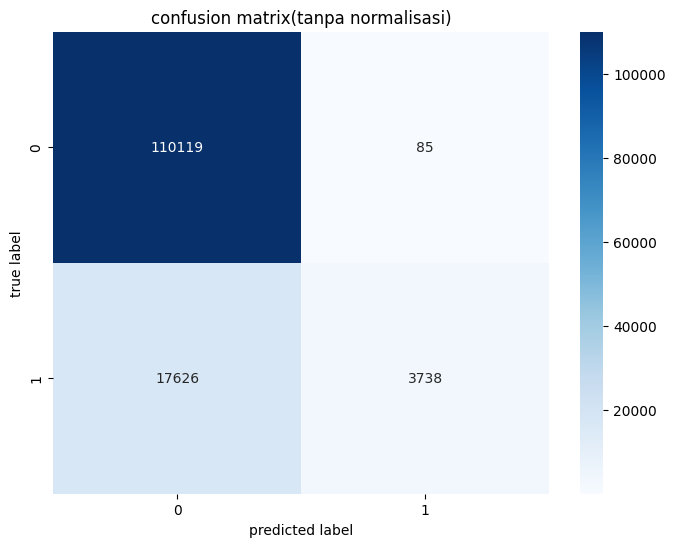

In [18]:
plt.figure(figsize=(8, 6))
grafik1 = confusion_matrix(uji_y, prediksi_tanpanormalisasi)
sns.heatmap(grafik1, annot = True, fmt='d', cmap = 'Blues')
plt.title('confusion matrix(tanpa normalisasi)')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

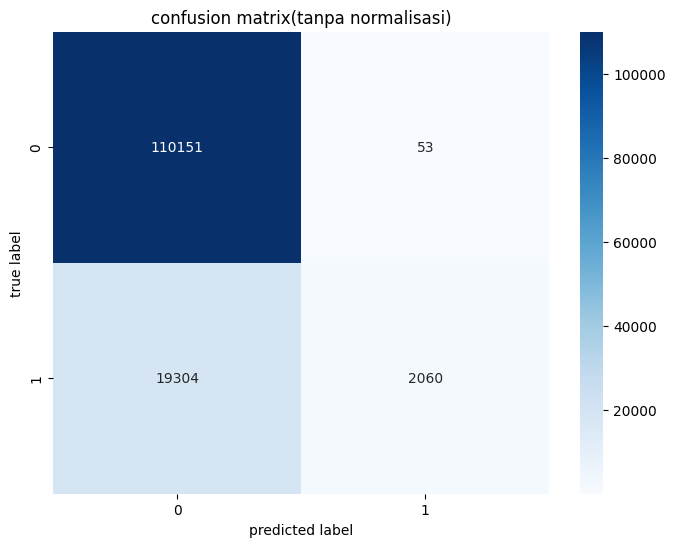

In [19]:
plt.figure(figsize=(8, 6))
grafik2 = confusion_matrix(uji_y, prediksi_normalisasi)
sns.heatmap(grafik2, annot = True, fmt='d', cmap = 'Blues')
plt.title('confusion matrix(tanpa normalisasi)')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

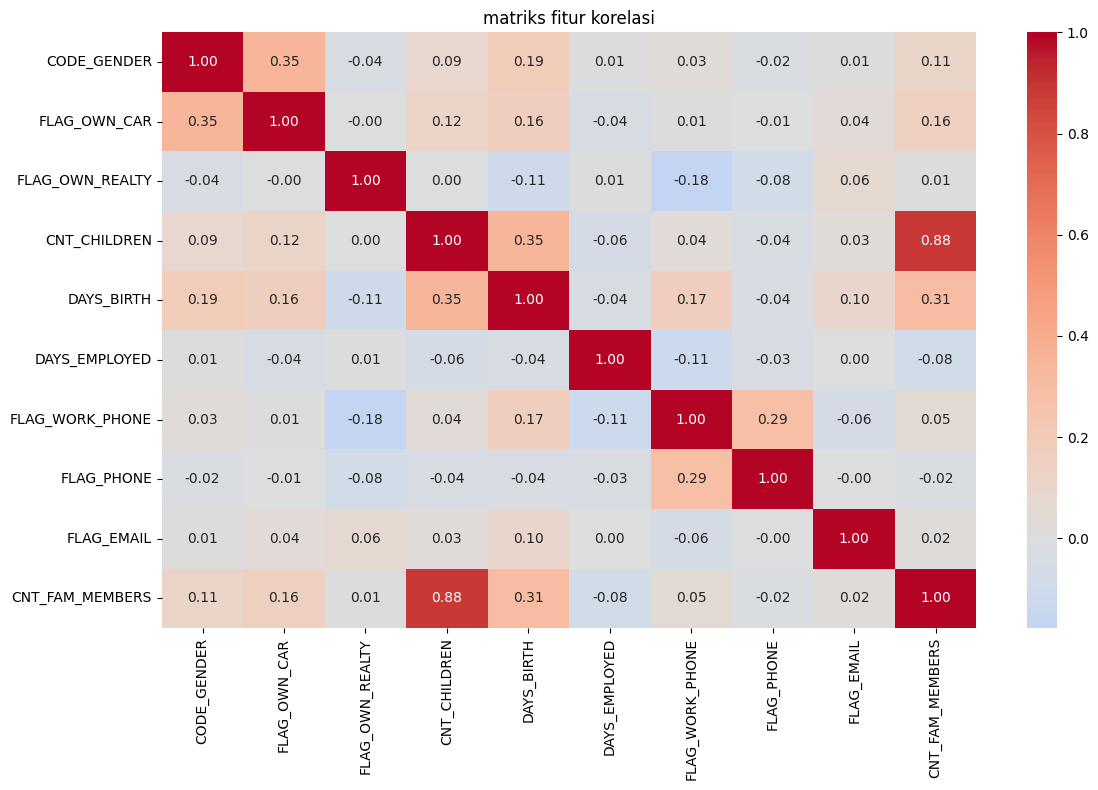

In [20]:
plt.figure(figsize=(12, 8))
matrikskorelasi = X.corr()
sns.heatmap(matrikskorelasi, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('matriks fitur korelasi')
plt.tight_layout()
plt.show()

In [21]:
pred_probabilitas1 = modelterbaik_tanpanormalisasi.predict_proba(uji_x)[:,1]
fpr1, tpr1, _ = roc_curve(uji_y, pred_probabilitas1)
roc_auc = auc(fpr1, tpr1)

pred_probabilitas2 = modelterbaik_normalisasi.predict_proba(skala_uji_x)[:,1]
fpr2, tpr2, _ = roc_curve(uji_y, pred_probabilitas2)
roc_auc = auc(fpr2, tpr2)

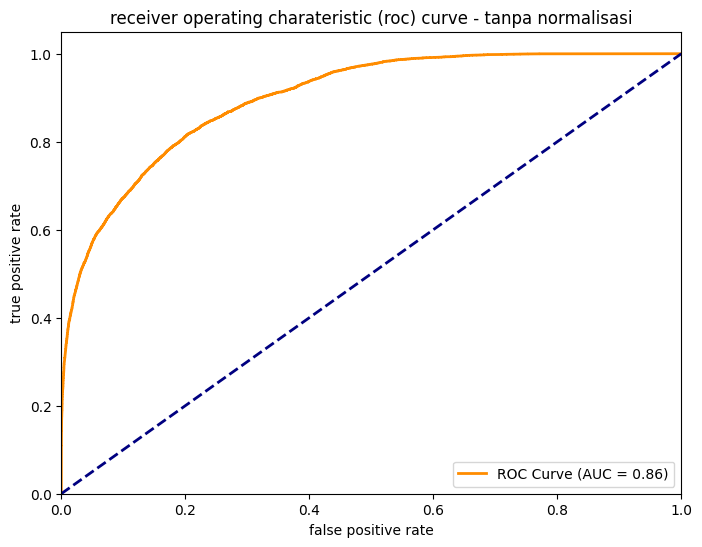

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating charateristic (roc) curve - tanpa normalisasi')
plt.legend(loc="lower right")
plt.show()

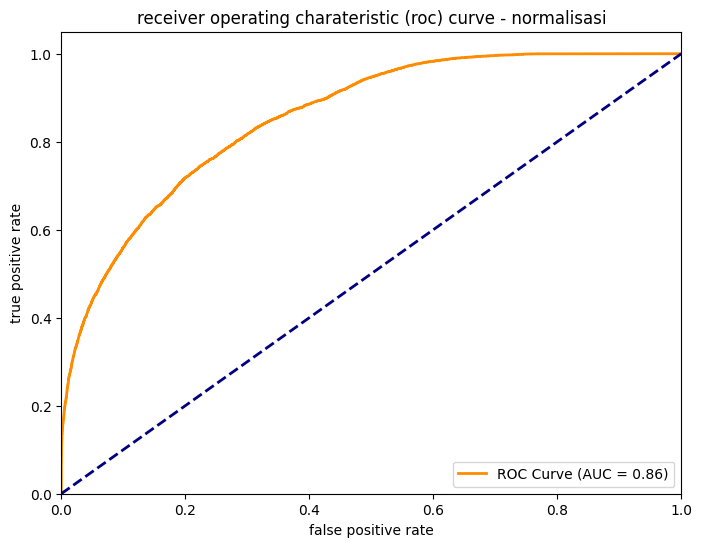

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating charateristic (roc) curve - normalisasi')
plt.legend(loc="lower right")
plt.show()